# Task 3

In [1]:
from vector_fields import read_vectorfield_data, estimate_vectors, solve_trajectory
from function_approximation import approx_lin_func, approx_nonlin_func, plot_func_over_data, compute_bases
import matplotlib.pyplot as plt
import numpy as np
import math

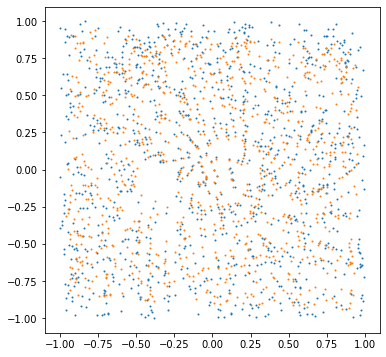

In [2]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="linear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
plt.show()

#### Part 1

Try to estimate a linear operator A for the nonlinear vector fields with unknown deltaT

In [3]:
delta_t = 0.1
v = (x1 - x0) / delta_t
A, residuals, _, _ = approx_lin_func(data=(x0,v))

In [4]:
x0.shape, A.shape

((1000, 2), (2, 2))

In [5]:
x0[0].shape

(2,)

In [5]:
from scipy.integrate import solve_ivp
def linear_vector_field(t, y): 
    return A @ y

In [16]:
def solve_trajectory(x0, x1, funct, end_time=0.1, plot=False):
    """
    Solves initial value point problem for a dataset, up to a certain moment in time
    :param x0: the data at time 0
    :param x1: the data at unknown time step after 0
    :param funct: to get derivative for next steps generation
    :param end_time: end time for the simulation
    :param plot: boolean to produce a scatter plot of the trajectory (orange) with the final x1 points in blue
    :returns: points at time end_time
    """
    x1_pred = []
    for i in range(len(x0)):
        sol = solve_ivp(funct, [0, end_time], x0[i], t_eval=np.linspace(0, 0.1, 100))
        x1_pred.append([sol.y[0,-1], sol.y[1,-1]])
        if plot:
            plt.scatter(x1[i,0], x1[i,1], c='blue', s=10)
            plt.scatter(sol.y[0,:],sol.y[1,:], c='orange', s=4)
    if plot:
        plt.rcParams["figure.figsize"] = (14,14)
        plt.show()
    return x1_pred

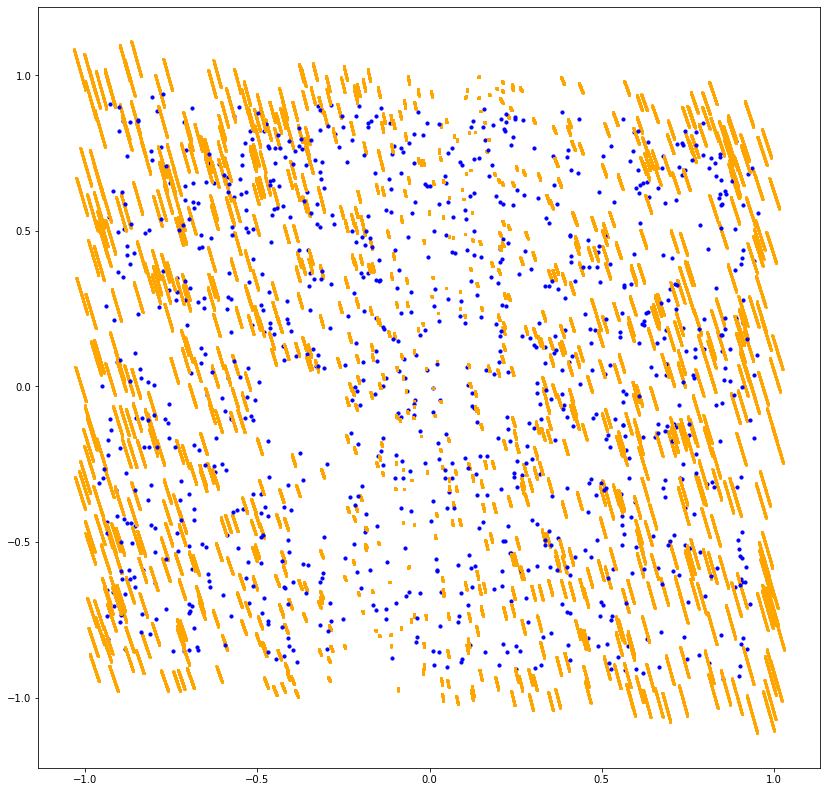

[[-0.17225670264671372, 0.4676467173413924],
 [-1.0293816388872883, -0.2913101565821697],
 [-0.7259455807916764, -0.7521146031380896],
 [-0.6458974619446405, -0.24475795665546674],
 [-0.2130158646652283, 0.10217701968433232],
 [-0.1675861431351074, 0.3956022216853885],
 [-0.6113114209706852, 0.8367641041920906],
 [-0.9751756855344759, 0.4530203804361054],
 [-0.1707890199914199, 0.1381011899452693],
 [-0.73965343484415, -0.5351012451943092],
 [0.6173913935319826, 0.8873673182181395],
 [-0.38565985934121694, 0.43369965375481906],
 [0.773728199688068, 0.7203350989890847],
 [-0.8528663038921613, -0.8469503805552692],
 [-0.6826809548392553, 0.8445461418960852],
 [-0.8275355002655274, -0.07112945911721023],
 [0.9437113613542946, -0.03463981132764647],
 [0.39654503270534414, -0.4189056282463893],
 [0.38262116714313155, 0.6404689278483677],
 [-0.9943691228189189, 0.6174685213248582],
 [1.0063792666102784, 0.39670944651833356],
 [-0.45417587550818467, 0.6387043496368732],
 [-0.817624195152957, 

In [15]:
v = estimate_vectors(x0, x1, 0.1)
A, _, _, _ = approx_lin_func(data=(x0,v))
solve_trajectory(x0,x1, linear_vector_field, plot=True)

In [12]:
plt.rcParams["figure.figsize"] = (14,14)

def linear_vector_field(t, y): 
    return A @ y

for dt in np.linspace(0, 0.1, 100):
    v = estimate_vectors(x0, x1, dt)
    A, _, _, _ = approx_lin_func(data=(x0,v))
    x1_pred = solve_trajectory(x0, x1, linear_vector_field, plot=False)
    print(dt, np.linalg.norm(x1_pred-x1)**2 / x1.shape[0])

0.0 0.004550208508042289
0.00101010101010101 0.004538913349564642
0.00202020202020202 0.004528579276418486
0.0030303030303030303 0.004519207849321192
0.00404040404040404 0.00451080063053859
0.00505050505050505 0.00450335918388603
0.006060606060606061 0.004496885074729431
0.007070707070707071 0.004491379869986353
0.00808080808080808 0.004486845138127032
0.00909090909090909 0.004483282449175449
0.0101010101010101 0.004480693374710389
0.011111111111111112 0.004479079487866491
0.012121212121212121 0.004478442363335306
0.013131313131313131 0.0044787835773663605
0.014141414141414142 0.004480104707768222
0.015151515151515152 0.004482407333909535
0.01616161616161616 0.004485693036720101
0.01717171717171717 0.0044899633986919315
0.01818181818181818 0.004495220003880312
0.01919191919191919 0.004501464437904853
0.0202020202020202 0.004508698287950561
0.021212121212121213 0.004516923142768897
0.022222222222222223 0.004526140592678835
0.023232323232323233 0.004536352229567927
0.024242424242424242 0

In [20]:
def approx_vector_field_and_find_A(x0, x1, delta_t):
    v = (x1 - x0) / delta_t
    A, _, _, _ = approx_lin_func(data=(x0,v))
    return A
    
def create_prediction(x0, x1):
    x1_pred = []
    for i in range(len(x0)):
        sol = solve_ivp(linear_vector_field, [0, 0.1], x0[i], t_eval=np.linspace(0, 0.1, 100))
        x1_pred.append([sol.y[0,-1], sol.y[1,-1]])
    return x1_pred

In [53]:
# mse calculation trying different delta_t
attempts = []
for dt in np.linspace(0.0001, 0.5, 500):
    A = approx_vector_field_and_find_A(x0, x1, dt)
    x1_pred = create_prediction(x0, x1)
    attempts.append([dt, np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]])
    print(f"attempting with {attempts[-1][0]} got mse: {attempts[-1][1]}")

attempting with 0.0001 got mse: 0.5837770188446816
attempting with 0.0011018036072144289 got mse: 0.5847280387735483
attempting with 0.0021036072144288574 got mse: 0.5693898618141339
attempting with 0.0031054108216432862 got mse: 0.5119077529872891
attempting with 0.0041072144288577155 got mse: 0.4412437282609119
attempting with 0.005109018036072144 got mse: 0.37499507935855564
attempting with 0.006110821643286573 got mse: 0.3181653889555301
attempting with 0.007112625250501002 got mse: 0.2709491989718904
attempting with 0.00811442885771543 got mse: 0.23210728025109612
attempting with 0.009116232464929859 got mse: 0.20016025548914096
attempting with 0.010118036072144287 got mse: 0.1737767574174174
attempting with 0.011119839679358716 got mse: 0.1518562835182706
attempting with 0.012121643286573145 got mse: 0.13351957051006985
attempting with 0.013123446893787574 got mse: 0.1180732778826174
attempting with 0.014125250501002003 got mse: 0.10497230563887684
attempting with 0.0151270541082

attempting with 0.12532545090180358 got mse: 0.002723064746339433
attempting with 0.12632725450901802 got mse: 0.002717887019594616
attempting with 0.12732905811623244 got mse: 0.0027131152606187027
attempting with 0.12833086172344688 got mse: 0.002708732935845897
attempting with 0.12933266533066132 got mse: 0.0027047242249386315
attempting with 0.13033446893787573 got mse: 0.0027010739862599804
attempting with 0.13133627254509017 got mse: 0.002697767724225716
attempting with 0.13233807615230458 got mse: 0.0026947915584220015
attempting with 0.13333987975951903 got mse: 0.002692132194382122
attempting with 0.13434168336673344 got mse: 0.0026897768959229353
attempting with 0.13534348697394788 got mse: 0.0026877134589482635
attempting with 0.1363452905811623 got mse: 0.00268593018663236
attempting with 0.13734709418837673 got mse: 0.0026844158659022955
attempting with 0.13834889779559117 got mse: 0.0026831597451438243
attempting with 0.1393507014028056 got mse: 0.0026821515130594563
atte

attempting with 0.24954909819639276 got mse: 0.003064391407294528
attempting with 0.2505509018036072 got mse: 0.0030686054284281257
attempting with 0.25155270541082164 got mse: 0.0030728091934808326
attempting with 0.25255450901803606 got mse: 0.003077002557592673
attempting with 0.25355631262525047 got mse: 0.0030811853822507503
attempting with 0.2545581162324649 got mse: 0.0030853575350875797
attempting with 0.25555991983967935 got mse: 0.0030895188896858904
attempting with 0.25656172344689376 got mse: 0.0030936693253896972
attempting with 0.2575635270541082 got mse: 0.00309780872712139
attempting with 0.25856533066132265 got mse: 0.003101936985204691
attempting with 0.25956713426853706 got mse: 0.0031060539951932266
attempting with 0.26056893787575147 got mse: 0.003110159657704547
attempting with 0.2615707414829659 got mse: 0.003114253878259419
attempting with 0.26257254509018035 got mse: 0.003118336567126191
attempting with 0.26357434869739477 got mse: 0.0031224076391700648
attempt

attempting with 0.37477454909819635 got mse: 0.0034988446951637157
attempting with 0.37577635270541077 got mse: 0.0035016027767587293
attempting with 0.37677815631262523 got mse: 0.0035043509639474148
attempting with 0.37777995991983965 got mse: 0.0035070892984307793
attempting with 0.37878176352705406 got mse: 0.0035098178218503587
attempting with 0.37978356713426853 got mse: 0.0035125365757840976
attempting with 0.38078537074148294 got mse: 0.0035152456017423675
attempting with 0.38178717434869736 got mse: 0.0035179449411641126
attempting with 0.38278897795591177 got mse: 0.003520634635413156
attempting with 0.38379078156312624 got mse: 0.003523314725774599
attempting with 0.38479258517034065 got mse: 0.0035259852534513707
attempting with 0.38579438877755506 got mse: 0.0035286462595608913
attempting with 0.38679619238476953 got mse: 0.003531297785131862
attempting with 0.38779799599198395 got mse: 0.0035339398711011502
attempting with 0.38879979959919836 got mse: 0.003536572558310805

attempting with 0.5 got mse: 0.0037790695318709764


In [ ]:
def compute_step(A, x0, delta_t):
    return x0 + delta_t * x0 @ A.T

In [ ]:
# mse at initial positions
np.linalg.norm(x1 - x0)**2 / len(x0)

In [ ]:
step = delta_t / 1000
end_time = delta_t
slc = 100
new_x0 = x0
prev_lstsq = (math.inf, math.inf)
plt.rcParams["figure.figsize"] = (14,14)
plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='red')
for i in range(int(end_time / step)):
    curr_lstsq = np.linalg.norm(x1 - new_x0)**2 / len(new_x0)
    print(curr_lstsq)
    if curr_lstsq < prev_lstsq[0]:
        prev_lstsq = (curr_lstsq, step*i + step)
    new_x0 = compute_step(A, new_x0, step)
    plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='orange', s=10)
plt.scatter(x1[:slc,0],x1[:slc,1], c='blue')
print(prev_lstsq)
plt.show()


#### Part 2

Try to approximate the vector field using radial basis functions (with the number of centers between
100 and 1000)

In [ ]:
n_bases = 500
delta_t = 0.01
v = (x1 - x0) / delta_t
centers = np.random.choice(x0.ravel(), replace=False, size=n_bases)
C, residuals, ranks, singv, centers, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=10, centers=centers)
residuals, ranks

In [ ]:
def compute_step(C, phi, x0, delta_t):
    return x0 + delta_t * phi @ C

In [ ]:
# mse at initial positions
np.linalg.norm(x1 - x0)**2 / len(x0)

In [ ]:
step = delta_t / 10 
end_time = delta_t*100
new_x0 = x0
slc=100
prev_lstsq = (math.inf, math.inf)
plt.rcParams["figure.figsize"] = (14,14)
plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='red')
for i in range(int(end_time / step)):
    curr_lstsq = np.linalg.norm(x1 - new_x0)**2 / len(new_x0)
    if curr_lstsq < prev_lstsq[0]:
        prev_lstsq = (curr_lstsq, step*i + step)
    new_x0 = compute_step(C, phi, new_x0, step)
#     print(curr_lstsq)
    plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='orange', s=2)
    phi, centers = compute_bases(points=new_x0, centers=centers, eps=eps, n_bases=n_bases)
plt.scatter(x1[:slc,0],x1[:slc,1], c='blue')
print(prev_lstsq)
plt.show()